# Project Overview
In the Google Capstone project, students are tasked with using public Fitbit device data to help BellaBeat (a competitor in the fitness accessory space) learn how users use their devices. This analysis intends to help BellaBeat marketing and engineers improve sales and design to make customers happy.
   
The Capstone Project will proceed in sections through the Ask, Prepare, Analyze, Share, and Act stages of my analysis.  Readers can easily skip to any section they are interested in using the bold healines that mark the beginning of each section.  
    
**Thanks for checking out my project!  I'd love to hear your thoughts on what you think I could improve!**

# 1. Ask
In this particular project, BellaBeat's CEO, Urška Sršen, already has a list of questions she wants answered.  My analysis attempts to answer these questions with the data available.  Urška is the primary stakeholder for this analysis along with Sando Mur, BellaBeat's cofounder, and the BellaBeat Marketing Analytics team.

**Urska's Questions:**
- What are some trends in smart device usage?
- How could these trends apply to Bellabeat customers?
- How could these trends help influence Bellabeat marketing strategy

**BellaBeat Products:**
- Bellabeat app: Provides users with health data on activity, sleep, stress, menstrual cycle, and mindfulness habits. 
- Leaf: classic wellness tracker. can be worn as a bracelet, necklace, or clip. Connects to the Bellabeat app. Tracks activity, sleep, and stress.
- Time: Wellness watch with timeless look of a classic timepiece. Tracks user activity, sleep, and stress. Connects to theBellabeat app
- Spring: Water bottle tracks daily water intake. Connects to Bellabeat app
- Bellabeat membership: Subscription-based membership program for users. Membership gives 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty.

# 2. Prepare
The following data source was publically available on Kaggle and are attached to this project in the data tab.  

**FitBit Fitness Tracker Data:** This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

Data Frames used:
*     dailyActivity_merged.csv dataset 
*     sleepDay_merged.csv 
*     weightLogInfo_merged.csv 
*     hourlyCalories_merged.csv 
*     hourlySteps_merged.csv 


# 3. Process 
I cleaned the origional data sets twice. Once with Sequel (SQL) and one with Python.  This was simply to show an understanding of both coding languages. It was also included so others learning one of the two coding languages can follow my work.   

**Data Cleaning Markdowns are organized by individual Data Frames below**


**1. dailyActivity_orig.csv cleaning (Python)**

dailyActivity_merged.csv
- Date column data type (String) changed to DATE data type.
- Date Column containing format (dd/mm/yyyy 00:00:00) split into seperate Date and Time columns 
- DayofWeek column added.
     


In [6]:
import pandas as pd
#convert activitydate column from object to date data type
dailyactivity_c = pd.read_csv('../input/orig-files/dailyActivity_orig.csv')
dailyactivity_c['ActivityDate']=pd.to_datetime(dailyactivity_c['ActivityDate'])
dailyactivity_c.info()
#add day of week column
dailyactivity_c['DayofWeek']= dailyactivity_c['ActivityDate'].dt.day_name()

#Look for duplicates 
column_names= ['Id', 'ActivityDate']
dailyactivity_c['duplicate']=dailyactivity_c.duplicated(subset= column_names, keep=False)
dailyactivity_c.sort_values(by=['duplicate'])
#after sorting for duplicates none were found 

#Here i identified 77 rows with 15 unique user IDs that had 0 total steps logged.
#While 0 total steps in a day can logically be assumed to be a day when that user 
#didnt ustheir device, I decided to keep these rows as analysis of my indivuduals 
#didnt use their devices could also be valuble to stakeholders.
didnt_use=dailyactivity_c[dailyactivity_c['TotalSteps']==0]
len(pd.unique(didnt_use['Id']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

15

**dailyActivity_orig Cleaning (SQL code)**

SELECT Id, 
CAST(PARSE_DATE('%m/%d/%Y', ActivityDate)AS DATE) AS ActivityDate,
TotalSteps, TotalDistance, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories 
FROM `symmetric-ray-351207.fitabase_data.dailyAct_orig` 
WHERE TotalSteps > 0 AND TotalDistance > 0 AND SedentaryActiveDistance < 1440
ORDER BY Id


SELECT Id, ActivityDate,
EXTRACT(DAYOFWEEK FROM ActivityDate) AS DayofWeek,
TotalSteps, TotalDistance, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories 
FROM `symmetric-ray-351207.fitabase_data.test123`
ORDER BY Id

**2. sleepDay_orig.csv cleaning (Python)**
- Date column data type (String) changed to DATE data type.
- Date Column containing format (dd/mm/yyyy 00:00:00) split into seperate Date and Time columns 
- DayofWeek column added

In [7]:
sleepday_c = pd.read_csv('../input/orig-files/sleepDay_orig.csv')

#convert Sleepdate column from object to date data type
sleepday_c['SleepDay']=pd.to_datetime(sleepday_c['SleepDay'])
sleepday_c.info()

#add day of week column
sleepday_c['DayofWeek']= sleepday_c['SleepDay'].dt.day_name()

#find duplicates/ drop duplicates 
column_names = ['Id', 'SleepDay','TotalMinutesAsleep']
sleepday_c['duplicate']=sleepday_c.duplicated(subset= column_names, keep=False)
sleepday_c.sort_values(by=['duplicate'])
sleepday_c.drop(sleepday_c[sleepday_c['duplicate']==True].index, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


**sleepDay_orig.csv cleaning (SQL)**

SELECT  Id, CAST(PARSE_DATETIME('%m/%d/%Y %r', SleepDay) AS DATETIME) AS SleepDate, 
TotalMinutesAsleep, TotalTimeInBed
FROM `symmetric-ray-351207.fitabase_data.sleepDay_orig` 
ORDER BY Id

SELECT  Id,CAST (SleepDate AS DATE) AS Date , EXTRACT(DAYOFWEEK FROM SleepDate) AS DayofWeek, TotalMinutesAsleep, TotalTimeInBed
FROM `symmetric-ray-351207.fitabase_data.sleepDay_clean` 
ORDER BY Id

**3. weightLogInfo_orig.csv cleaning (Python)**
- Date column data type (String) changed to DATE data type.  
- Date Column containing format (dd/mm/yyyy 00:00:00) split into seperate Date and Time columns 
- DayofWeek column added 

In [8]:
weightloginfo_c = pd.read_csv('../input/orig-files/weightLogInfo_orig.csv')

#change datetime object to datetime data type
weightloginfo_c['Date'] = pd.to_datetime(weightloginfo_c['Date'])

#split date and time into seperate columns and add day of week column
weightloginfo_c['DayofWeek']= pd.to_datetime(weightloginfo_c['Date']).dt.day_name()
weightloginfo_c['Time']= pd.to_datetime(weightloginfo_c['Date']).dt.time
weightloginfo_c['Date']= pd.to_datetime(weightloginfo_c['Date']).dt.date


#find duplicates/ drop duplicates 
column_names = ['Id', 'Date']
weightloginfo_c['duplicate']=weightloginfo_c.duplicated(subset= column_names, keep=False)
weightloginfo_c.sort_values(by=['duplicate'])
weightloginfo_c.drop(weightloginfo_c[weightloginfo_c['duplicate']==True].index, inplace=True)
#no duplicates found

**weightLogInfo_orig.csv cleaning (SQL)**

SELECT Id, CAST(PARSE_DATETIME('%m/%d/%Y %r', Date)AS DATETIME)AS Date, WeightKg, BMI, LogId  
FROM `symmetric-ray-351207.fitabase_data.weightLogInfo` 

SELECT Id, Date, EXTRACT(DAYOFWEEK FROM Date) AS Day, WeightKg, BMI, LogId 
FROM `symmetric-ray-351207.fitabase_data.weighttable_clean1` 


**4. hourlyCalories_merged.csv cleaning (Python)**
- Date column data type (String) changed to DATE data type.
- Date Column containing format (dd/mm/yyyy 00:00:00) split into seperate Date and Time columns 
- DayofWeek column added with values 1-7.  1=Sun, 2=Mon, 3=Tues and so on.  



In [9]:
hrcal_c= pd.read_csv('../input/orig-files/hourlyCalories_orig.csv')

#ActivityHour changed from object data type to datetime datatype
hrcal_c['ActivityHour']= pd.to_datetime(hrcal_c['ActivityHour'])

#split date, dayofweek, time into seperate columns 
hrcal_c['DayofWeek']= hrcal_c['ActivityHour'].dt.day_name()
hrcal_c['Time']= hrcal_c['ActivityHour'].dt.time
hrcal_c['Date']= hrcal_c['ActivityHour'].dt.date

#find duplicates/ drop duplicates 
column_names = ['Id', 'ActivityHour', 'Calories']
hrcal_c['duplicate']=hrcal_c.duplicated(subset= column_names, keep=False)
hrcal_c.sort_values(by=['duplicate'])
hrcal_c.drop(hrcal_c[hrcal_c['duplicate']==True].index, inplace=True)
#no dupicates found

**hourlyCalories_merged.csv cleaning (SQL)**

SELECT Id, 
CAST(PARSE_DATETIME('%m/%d/%Y %H:%M:%S', Date) AS DATE) AS Date, Calories
FROM `symmetric-ray-351207.fitabase_data.weightLogInfo_3`;

SELECT  Id, CAST (ActivityHour AS DATE)AS Date, EXTRACT(DAYOFWEEK FROM ActivityHour) AS DayofWeek, CAST(ActivityHour AS TIME)AS Time, Calories
FROM `symmetric-ray-351207.fitabase_data.hourlyCalories_clean` 
ORDER BY Id

**5. hourlySteps_merged_csv cleaning (Python)**
- Date column data type (String) changed to DATE data type.
- Date Column containing format (dd/mm/yyyy 00:00:00) split into seperate Date and Time columns 
- DayofWeek column added with values 1-7.  1=Sun, 2=Mon, 3=Tues and so on.  



In [10]:
hrstp_c = pd.read_csv('../input/orig-files/hourlySteps_orig.csv')

#convert datetime object to datetime data type
hrstp_c['ActivityHour']= pd.to_datetime(hrstp_c['ActivityHour'])

#split date into seperate date, time, and dayofweek columns 
hrstp_c['Date']= hrstp_c['ActivityHour'].dt.date
hrstp_c['Time']= hrstp_c['ActivityHour'].dt.time
hrstp_c['DayofWeek']= hrstp_c['ActivityHour'].dt.day_name()

#find duplicates/ drop duplicates 
column_names = ['Id', 'ActivityHour', 'StepTotal']
hrstp_c['duplicate']=hrstp_c.duplicated(subset= column_names, keep=False)
hrstp_c.sort_values(by=['duplicate'])
hrstp_c.drop(hrstp_c[hrstp_c['duplicate']==True].index, inplace=True)
#no dupicates found

**hourlySteps_merged_csv cleaning (SQL)**

SELECT Id, CAST(PARSE_DATETIME('%m/%d/%Y %H:%M:%S', Date) AS DATE) AS Date, StepTotal, LogId 
FROM `symmetric-ray-351207.fitabase_data.hourlySteps_clean`;

SELECT Id, CAST(ActivityHour AS DATE) AS Date, EXTRACT(DAYOFWEEK FROM ActivityHour)AS DayofWeek, CAST(ActivityHour AS TIME) AS ActivityHour, StepTotal 
FROM `symmetric-ray-351207.fitabase_data.hourlySteps_clean` 
ORDER BY Id



# 4. Analysis
I used Python to complete my analysis. I created visualizations to better understand the distrubution of the data and recognize patterns and relationships between variables. Explainations of the analysis as well as as the code used to do the analysis are broken into sections below. 




In [11]:
#import necessary packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statistics as st

#import data 
daily_activity = pd.read_csv('../input/bellabeat/dailyActivity_clean')
sleep_day= pd.read_csv('../input/bellabeat/sleepDay_clean')
weight_table = pd.read_csv('../input/bellabeat/weighttable_clean')
hourly_calories = pd.read_csv('../input/bellabeat/hourlyCalories_clean')
stpcal_hr_merge = pd.read_csv('../input/bellabeat/merged_hr-stp-cal_clean2')
dtwtsd_merge = pd.read_csv('../input/bellabeat/dt-wt-sd_merge')

**1. Average Daily Steps by Total Calories Burned (all users)**

This scatter plot shows that there is a clear positive corellation between daily steps and calories burned. This is a relativly obvious observation but serves as a baseline to certify that we have a reasonable dataset.   

Text(0.5, 1.0, 'Daily Steps by Total Calories')

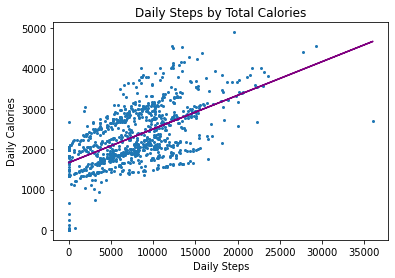

In [12]:
from matplotlib import pyplot as plt

m, b = np.polyfit(dailyactivity_c.TotalSteps, dailyactivity_c.Calories, 1)
plt.scatter(dailyactivity_c.TotalSteps, dailyactivity_c.Calories, s=4 )
plt.plot(dailyactivity_c.TotalSteps, m*dailyactivity_c.TotalSteps + b, color='purple')
plt.xlabel('Daily Steps')
plt.ylabel('Daily Calories')
plt.title('Daily Steps by Total Calories')

**2. Average Calories Burned by Time of Day (all users)**

This bar chart shows how Fitbit users average energy expendature (Calories) fluctuates throughout the day.  Bella beat can use this to advise their customer on how to adjust their energy expendature throughout the day in order to achieve their fitness/health goals.

(50.0, 130.0)

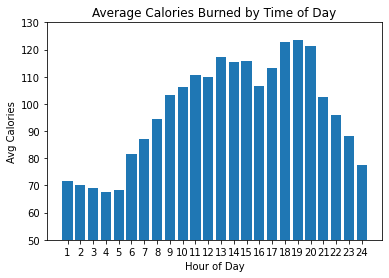

In [13]:
hrcal=stpcal_hr_merge.pivot_table(index='Time', values='Calories')
hrcal.reset_index(inplace=True)
plt.bar(hrcal.Time, hrcal.Calories)
plt.xlabel('Hour of Day')
plt.ylabel('Avg Calories')
plt.title('Average Calories Burned by Time of Day')
plt.xticks(['00:00:00','01:00:00','02:00:00','03:00:00','04:00:00','05:00:00','06:00:00',
'07:00:00','08:00:00','09:00:00','10:00:00','11:00:00','12:00:00','13:00:00','14:00:00',
'15:00:00','16:00:00','17:00:00','18:00:00','19:00:00','20:00:00','21:00:00',
'22:00:00','23:00:00'],['1', '2','3','4','5','6','7','8','9','10','11','12','13','14','15',
'16','17','18','19','20','21','22','23','24'])
plt.ylim(50, 130)

**3. Average Calories by Day of Week (All Users)**
    
This bar chart shows how Fitbit users average energy expendature (calories) fluctuates throughout the week.  Bella beat can use this to advise their customer on how to adjust their energy expendature throughout the day in order to achieve their fitness/health goals. 

(1000.0, 3500.0)

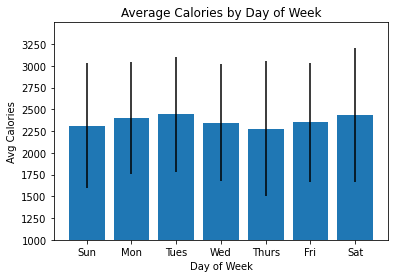

In [14]:
dwsteps= dtwtsd_merge.pivot_table(index='DayofWeek', values='Calories',aggfunc=[np.mean,np.std])
dwsteps.reset_index(inplace=True)
dwsteps.columns = ['DayofWeek', 'meanCal','stdCal']
error= dwsteps['stdCal']

plt.bar(dwsteps.DayofWeek, dwsteps.meanCal, yerr=error)
plt.xlabel('Day of Week')
plt.ylabel('Avg Calories')
plt.title('Average Calories by Day of Week')
plt.yticks([1000,1250,1500,1750 ,2000, 2250, 2500, 2750, 3000, 3250], [1000,1250,1500,1750 ,2000, 2250, 2500, 2750, 3000, 3250])
plt.xticks([1,2,3,4,5,6,7],['Sun', 'Mon','Tues','Wed','Thurs','Fri','Sat'])
plt.ylim(1000, 3500)

**4. Average Sleep Time (min) by Day of Week**

(250.0, 610.0)

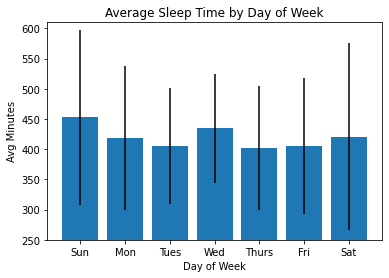

In [15]:
dwsleep= sleep_day.pivot_table(index='DayofWeek', values='TotalMinutesAsleep', aggfunc=[np.mean, np.std])
dwsleep.reset_index(inplace=True)
dwsleep.columns = ['DayofWeek','meanminutesasleep','stdminutesasleep']
error = dwsleep['stdminutesasleep']

plt.bar(dwsleep.DayofWeek, dwsleep.meanminutesasleep, yerr=error)
plt.xlabel('Day of Week')
plt.ylabel('Avg Minutes')
plt.title('Average Sleep Time by Day of Week')
plt.yticks([250, 300,350, 400, 450, 500, 550, 600], [250, 300,350, 400, 450, 500, 550, 600])
plt.xticks([1,2,3,4,5,6,7],['Sun', 'Mon','Tues','Wed','Thurs','Fri','Sat'])
plt.ylim(250, 610)

**5. Activity Intensity by Time of Day**

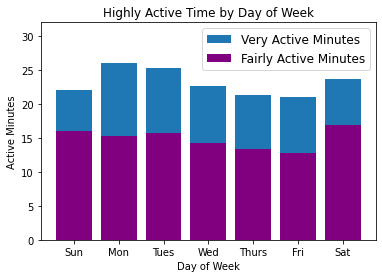

In [16]:
dow_veryactive= dtwtsd_merge.pivot_table(index='DayofWeek', values='VeryActiveMinutes')
dow_fairlyactive= dtwtsd_merge.pivot_table(index='DayofWeek', values='FairlyActiveMinutes')

dow_veryactive.reset_index(inplace=True)
dow_fairlyactive.reset_index(inplace=True)

plt.bar(dow_veryactive.DayofWeek, dow_veryactive.VeryActiveMinutes, label='Very Active Minutes')
plt.bar(dow_fairlyactive.DayofWeek, dow_fairlyactive.FairlyActiveMinutes, label='Fairly Active Minutes', color='purple')
plt.xlabel('Day of Week')
plt.ylabel('Active Minutes')
plt.title('Highly Active Time by Day of Week')
plt.xticks([1,2,3,4,5,6,7],['Sun', 'Mon','Tues','Wed','Thurs','Fri','Sat'])
plt.ylim(0,32)
plt.legend(fontsize=12)

**6. Device non-usage by Day of Week**

([<matplotlib.axis.XTick at 0x7fb9ca0d1c50>,
 [Text(0, 0, 'Sun'),
  Text(1, 0, 'Mon'),
  Text(2, 0, 'Tues'),
  Text(3, 0, 'Wed'),
  Text(4, 0, 'Thurs'),
  Text(5, 0, 'Fri'),
  Text(6, 0, 'Sat')])

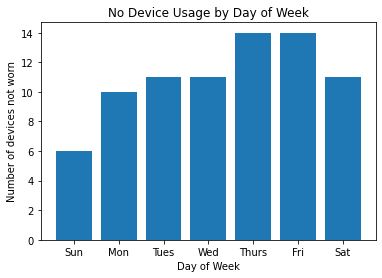

In [17]:
#Graphs number of devices that recorded 0 total steps by day of the week.
dailyact_none= dailyactivity_c[dailyactivity_c['TotalSteps']==0]
none=dailyact_none.pivot_table(index='DayofWeek', values= 'SedentaryMinutes', aggfunc='count')

none.reset_index(inplace=True)
plt.bar(none.DayofWeek, none.SedentaryMinutes)
plt.xlabel('Day of Week')
plt.ylabel('Number of devices not worn')
plt.title('No Device Usage by Day of Week')
plt.xticks([0,1,2,3,4,5,6],['Sun', 'Mon','Tues','Wed','Thurs','Fri','Sat'])
#This give us an idea if their are any trends in when users avoid or forget to wear their device

# 5. Share 
Based on the analysis and visualizations above there are a number of important patterns that became apparent. Below I will give an overview of these patterns and what they may indicate in terms up users habits.  

What are some trends in smart device usage?
How could these trends apply to Bellabeat customers?
How could these trends help influence Bellabeat marketing strategy

**1.Trends in Fitbit Device Usage:**


Because smart smart devices (Fitbits) are worn at all times there isnt very much we can say directly about device usage.  The only data points we have that relate directly to user interation with their device are, the 'logged activity distance', in which users input the distance of their activity such as cycling, running, or walking, and device non-usage, when Fitbit user devices were on but didnt record any movement data, indicating the user didnt wear their watches.  The "logged activity distance" data only has 16 data points in more than 900 rows of recorded data so our sample isn't meaningful for analysis.  The device non-usage data on the other hand shows that there are more non-usage days   later in the work week, perhaps indicating that Fitbit customers are less likely to wear/track their data as the week progresses.

Other exercise trends that were apparent but didnt directly relate to device usage are listed below


* Peak activity was between 5-8pm. Likely indicating that Many chose to exercise around the end of the workday
* Very Active and Fairly active activities were most frequent early in the work week and became less frequent from Monday-Friday.  Perhaps an indicator that users lose motivation ot exercise as the workweek progresses
* Overall activity declines throughout the workweek(Mon-Fri) in both intensity and volume.



**2.Limitations of Analysis:** 
* Data such as calories, steps, activity level, hour/time-of-day give you good information on when users are active and the intensity of their activity but it doesnt help you determine what specific type of exercise they are doing or why they wanted a fitness tracking device in the first place.  If you want to give customers recommendations/tips on how to imporve their workouts and habits you need to learn more about what type of exercise they're doing (cardio, powerlifting, athletics, etc.) and what their goals are (lose weight, gain muscle, lower blood pressure, etc.)
* The total sample size of the fitbit dataset is 30 people.  While this data is still usable, one must be aware that a few outlier individuals in a data set of this size (n=30) can have a outsized effect on your analysis and it would be preferable to analyze a much larger set of user data.
* One of the guiding questions of this analysis is "What are some trends in smart device usage?".  We dont have the right type of data to meaningfully answer that question.  We dont know anything about how users interacted with their Fitbit.  It would greatly imporve out analysis if we had data on when users measured steps/sleep or checked daily calories/weight. the little data we did have on logged weight change wasnt useful as the sample size was too small to use for statistically significant analysis.     

# 6. Act

Below are my recommendations for BellaBeat based on analysis and trends outlined in sections four and 5. 

1. How could trends apply to Bellabeat customers?

The trends discussed in section 4 and 5 could be used to give BellaBeat devices a competitive advatage over Fitbit Devices. Specific examples are outlined below

* Daily workout reminders could be used to prevent users from slacking off their exercise as the week progresses.  We see that, on average, users spend less minutes "very active" and "fairly active" during the work week (Mon-Fri).

* Sleep Trackers and Bedtime Reminders would help BellaBeat users build better sleep habits and recognize when they arent getting quality sleep.  The CDC recommends that adults age 18-60 get at least 7 hours of sleep each night.  My analysis shows that among the Fitbit users analyzed users get seven hours or more of sleep only 2 out of 7 weekdays on average.   

* Many potential customers are likely not aware that the trends found above apply to them as well.  Weekly sleep and exercise reports would help BellaBeat Users to better understand their exercise/sleep habits and optimize them to improve their quality of life. These reports could also be combined with individual user data to provide recommendations on what users could do to improve their sleep or exercise. 

2. How could these trends help influence Bellabeat marketing strategy?
   
BellaBeat could touch upon the trends discovered in Fitbit data to speak directly to issues device users struggle with.  For example, Facebook advertisments with ad copy such as "Feel sluggish as the work week progresses?  Track your sleep and recieve sleep reports and recommendations when wearing your BellaBeat Device. Dont just survive the workweek, crush it!".  This sort of direct connection with the customer builds rapport and creates a connection in potential customers minds with your brand.  This is extrmemly valuble, especially for a new company such as BellaBeat.

BellaBeat could also benifit from user generated content(UGC) in which current BellaBeat customers share their positive experiences with other potential users in the form of an online advertisment or product review.  Users could be paid to record a short video sharing how BellaBeat has imporved their sleep and or workouts.  This material could then be added to the website or used as ad material on Social media or Search engine advertisements.  These UGC ads are the gold standard in digital advertising as they build trust between customers and brands.  A rel customer sharing real experiences will always be more trustworthy that traditional advertising copy/creatives.
    
